# Проектная работа: Линейные модели в машинном обучении

### Цель исследования: 
* Разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке коров. 



### Этапы исследования: 
##### 1. Обзор данных.
* Вывод общей инфомации и описательной статистики
* Визуализация данных 

##### 2. Предобработка данных.

##### 3. Исследовательский анализ данных
* Статистический анализ признаков;
* Построение графиков для каждого признака;
* Выводы по разделу.

##### 4.  Корреляционный анализ признаков в датасете ferma_main.csv
* Изучение взаимосвязи между признаками;
* Построение диаграммы рассеяния для количественных признаков с учётом значения категориальных признаков;
* Выводы по разделу.

##### 5. Задача регрессии
* Подготовка данных и обучение на них трех моделей простой линейной регрессии LinearRegression. В качестве целевого признака - Удой, кг.
* Оценка качества моделей;
* Выводы по разделу.


##### 6. Задача классификации
* Подготовка данных и обучение модели LogisticRegression. В Качестве целевого признака - Вкус молока;
* Получите прогноз вкуса молока коров.


##### 7. Подведение итогов
* Описание результатов работы моделей МО (далее - Машинное обучение) для фермера;
* Рекоммендации фермеру;
* Выводы о моделях линейной регрессии и логистической регрессии.

Файл **ferma_main.csv** содержит данные о стаде фермера на текущий момент. 

*Содержит данные:*
* `id` — уникальный идентификатор коровы.
* `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
* `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
* `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
* `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
* `Порода` — порода коровы.
* `Тип пастбища` — ландшафт лугов, на которых паслась корова.
* `порода папы_быка` — порода папы коровы.
* `Жирность,%` — содержание жиров в молоке (в процентах).
* `Белок,%` — содержание белков в молоке (в процентах).
* `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
* `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
* Признаки в датасете ferma_main.csv можно разделить на группы.
* Характеристики коровы: id, Порода, порода папы_быка, Возраст.
* Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
* Характеристика пастбища: Тип пастбища.
* Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
* Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.

Файл **ferma_dad.csv**  хранит имя папы каждой коровы в стаде фермера. 

*Содержит данные:*
* id — уникальный идентификатор коровы.
* Имя Папы — имя папы коровы.
 
Файл **cow_buy.csv** — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

*Содержит данные:*
* Порода — порода коровы.
* Тип пастбища — ландшафт лугов, на которых паслась корова.
* порода папы_быка — порода папы коровы.
* Имя_папы — имя папы коровы.
* Текущая_жирность,% — содержание жиров в молоке (в процентах).
* Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
* Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    r2_score,
    precision_score,
    recall_score,
    mean_absolute_error,
    mean_squared_error
)

## Загрузка данных

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

In [3]:
dataframes = [ferma_main, ferma_dad, cow_buy]

In [4]:
#Цикл для вывода общей информации и описательной статистики.

for data in dataframes: 
    display(data.head(5))
    display(data.info())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

None

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


None

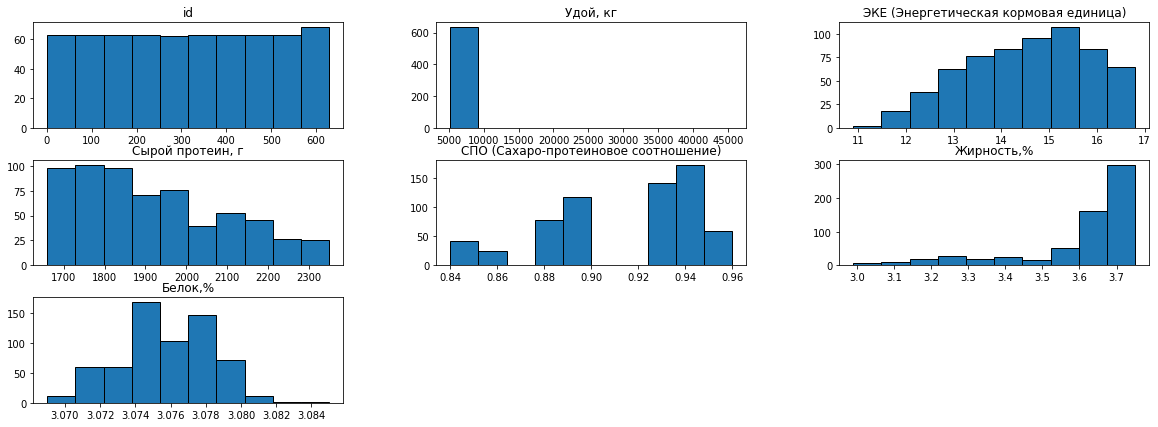

In [5]:
# Построим гистограмму для наглядного представления о числовых значениях
ferma_main.hist(figsize=(20, 7), edgecolor="black", grid = False)
plt.show()


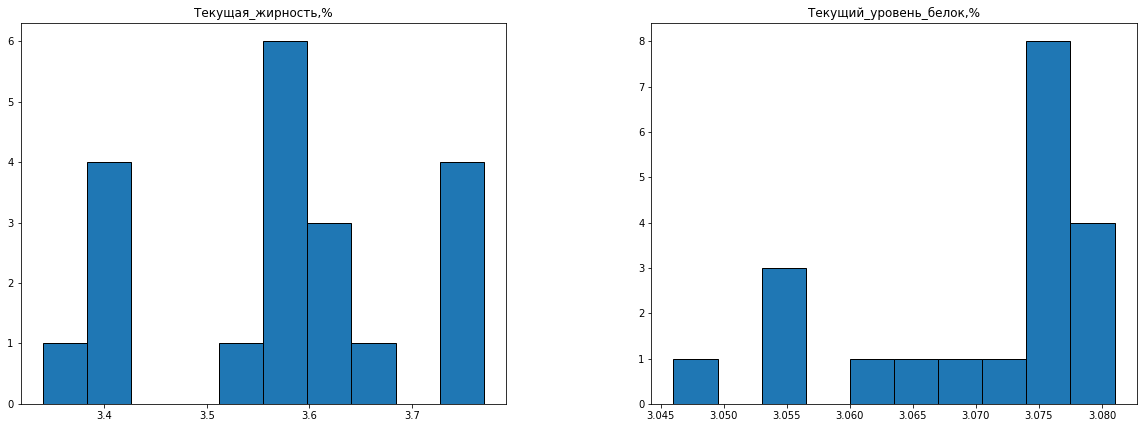

In [6]:
# Построим гистограмму для наглядного представления о числовых значениях 
cow_buy.hist(figsize=(20, 7), edgecolor="black", grid = False)
plt.show()

**Вывод:**
Данные содержатся в трёх файлах: `ferma_main.csv`, `ferma_dad.csv`, `cow_buy.csv`

`Датафрейм (ferma_main)`:

* датафрейм состоит из 634 строк и 12 колонок;

* датафрейм содердит числовые и тексторые значения;

* колонки необходимо привести к единому стилю snake_case;


в колонках:

* "ЭКЕ (Энергетическая кормовая единица)" - тип данных изменить на float;
*  "СПО (Сахаро-протеиновое соотношение)" - тип данных изменить на float;
*  "Жирность,%" - тип данных изменить на float;
*  "Белок,%" - тип данных изменить на float.
 
`Датафрейм (ferma_dad)`:

* Таблица состоит из 629 строк и 2 колонки;
* содердит числовые и тексторые значения;
* колонки имеют правильный тип данных.

`Датафрейм (cow_buy):`

* Таблица состоит из 20 строк и 7 колонок;
* колонки необходимо привести к единому стилю snake_case;

в колонках:
*  "Текущая_жирность,%" - тип данных изменить на float;    
*  "Текущий_уровень_белок,%" - тип данных изменить на float.

##  Предобработка данных

Приведем наименования колонок к единому стилю и соответствующим стандартам PEP8. 

In [7]:
# смена названий колонок в датасете cow_buy:

cow_buy.rename(columns={'Порода':'breed'}, inplace = True)
cow_buy.rename(columns={'Тип пастбища':'pasture_type'}, inplace = True)
cow_buy.rename(columns={'порода папы_быка':'dad_bull_breed'}, inplace = True)
cow_buy.rename(columns={'Имя_папы':'name_dad'}, inplace = True)
cow_buy.rename(columns={'Текущая_жирность,%':'current_fat'}, inplace = True)
cow_buy.rename(columns={'Текущий_уровень_белок,%':'current_protein'}, inplace = True)
cow_buy.rename(columns={'Возраст':'age'}, inplace = True)


# смена названий колонок в датасете ferma.main:

ferma_main.rename(columns={'Тип пастбища':'pasture_type'}, inplace = True)
ferma_main.rename(columns={'Удой, кг':'yield'}, inplace = True)
ferma_main.rename(columns={'ЭКЕ (Энергетическая кормовая единица)':'EKE'}, inplace = True)
ferma_main.rename(columns={'Сырой протеин, г':'raw_protein'}, inplace = True)
ferma_main.rename(columns={'СПО (Сахаро-протеиновое соотношение)':'SPO'}, inplace = True)
ferma_main.rename(columns={'Порода':'breed'}, inplace = True)
ferma_main.rename(columns={'Белок,%':'current_protein'}, inplace = True)
ferma_main.rename(columns={'Жирность,%':'current_fat'}, inplace = True)
ferma_main.rename(columns={'порода папы_быка':'dad_bull_breed'}, inplace = True)
ferma_main.rename(columns={'Вкус молока':'taste'}, inplace = True)
ferma_main.rename(columns={'Возраст':'age'}, inplace = True)

# смена названий колонок в датасете ferma_dad:

ferma_dad.rename(columns={'Имя Папы':'name_dad'}, inplace = True)

# Проверка корректности изменения названия колонок:

display(cow_buy.head())
display(ferma_main.head())
display(ferma_dad.head()) 

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


,id,yield,EKE,raw_protein,SPO,breed,pasture_type,dad_bull_breed,current_fat,current_protein,taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


,id,name_dad
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


**Проверим датафреймы на наличие пропусков:**

In [8]:
DataFrames = [ferma_main, cow_buy, ferma_dad]

In [9]:
for data in DataFrames:
    display(data.isna().sum())

id                 0
yield              0
EKE                0
raw_protein        0
SPO                0
breed              0
pasture_type       0
dad_bull_breed     0
current_fat        0
current_protein    0
taste              0
age                0
dtype: int64

breed              0
pasture_type       0
dad_bull_breed     0
name_dad           0
current_fat        0
current_protein    0
age                0
dtype: int64

id          0
name_dad    0
dtype: int64

**Вывод:** Пропущенные значения отсутствуют.

**Провередем проверку на предмет наличия явных дубликатов:**

In [10]:
for data in DataFrames:
    display(data.head(1))
    display(data.duplicated().sum())

,id,yield,EKE,raw_protein,SPO,breed,pasture_type,dad_bull_breed,current_fat,current_protein,taste,age
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет


5

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет


4

,id,name_dad
0,1,Буйный


0

In [11]:
# удалим 5 дубликатов из датасета ferma_main и проверим результат удаления:

ferma_main = ferma_main.drop_duplicates().reset_index(drop=True)
ferma_main.duplicated().sum()

0

In [12]:
# удалим 5 дубликатов из датасета cow_buy и проверим результат удаления:

cow_buy = cow_buy.drop_duplicates().reset_index(drop=True)
cow_buy.duplicated().sum()

0

удалили явные дубликаты.

In [13]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            16 non-null     object 
 1   pasture_type     16 non-null     object 
 2   dad_bull_breed   16 non-null     object 
 3   name_dad         16 non-null     object 
 4   current_fat      16 non-null     float64
 5   current_protein  16 non-null     float64
 6   age              16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


**Вывод:** в датасетах `ferma_main` было  5 дублей , в `buy_cow` было 4 дубля. Они успешно удалены.

Проверим датасеты на наличие неявных дубликатов:

In [14]:
ferma_main.head(1)

,id,yield,EKE,raw_protein,SPO,breed,pasture_type,dad_bull_breed,current_fat,current_protein,taste,age
0,1,5863,14.2,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет


### Проверим датафрейм `ferma_main` на наличие неявных дубликатов

In [15]:
# проверим ferma_main на наличие неявных дубликатов у категориальных значений
columns = ['breed', 'pasture_type', 'dad_bull_breed', 'taste', 'age']

for column in columns:
    unique_values = ferma_main[column].unique()
    print(f'Уникальные значения в колонке {column}: {unique_values}')

Уникальные значения в колонке breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в колонке pasture_type: ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в колонке dad_bull_breed: ['Айдиал' 'Соверин' 'Айдиалл']
Уникальные значения в колонке taste: ['вкусно' 'не вкусно']
Уникальные значения в колонке age: ['более_2_лет' 'менее_2_лет']


In [16]:
# заменим неявные дубликаты в столбцах pasture_type и dad_breed
ferma_main['pasture_type'] = ferma_main['pasture_type'].replace('Равнинные','Равнинное')
ferma_main['dad_bull_breed'] = ferma_main['dad_bull_breed'].replace('Айдиалл','Айдиал')

# также исправим разное написание одинаковых пород в столбцах breed и dad_breed
ferma_main['breed'] = ferma_main['breed'].replace('Вис Бик Айдиал','Айдиал')
ferma_main['breed'] = ferma_main['breed'].replace('РефлешнСоверинг','Соверин')

# проверим результат
for column in columns:
    unique_values = ferma_main[column].unique()
    print(f'Уникальные значения в колонке {column}: {unique_values}')

Уникальные значения в колонке breed: ['Айдиал' 'Соверин']
Уникальные значения в колонке pasture_type: ['Равнинное' 'Холмистое']
Уникальные значения в колонке dad_bull_breed: ['Айдиал' 'Соверин']
Уникальные значения в колонке taste: ['вкусно' 'не вкусно']
Уникальные значения в колонке age: ['более_2_лет' 'менее_2_лет']


### Проверим датафрейм `ferma_dad` на наличие неявных дубликатов

In [17]:
# проверим Датафрейм ferma_dad на наличие неявных дубликатов
ferma_dad['name_dad'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

### Проверим датафрейм `cow_buy` на наличие неявных дубликатов

In [18]:
cow_buy.head()

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [19]:
# проверим Датафрейм cow_buy на наличие неявных дубликатов
columns = ['breed', 'pasture_type', 'dad_bull_breed', 'name_dad', 'age']

for column in columns:
    unique_values = cow_buy[column].unique()
    print(f'Уникальные значения в колонке {column}: {unique_values}')

Уникальные значения в колонке breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в колонке pasture_type: ['холмистое' 'равнинное']
Уникальные значения в колонке dad_bull_breed: ['Айдиал' 'Соверин']
Уникальные значения в колонке name_dad: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Уникальные значения в колонке age: ['более_2_лет' 'менее_2_лет']


In [20]:
# изменим названия пород в столбцах breed и dad_bull_breed, столбце pasture_type приведем к соответствию
cow_buy['breed'] = cow_buy['breed'].replace('Вис Бик Айдиал','Айдиал')
cow_buy['breed'] = cow_buy['breed'].replace('РефлешнСоверинг','Соверин')
cow_buy['pasture_type'] = cow_buy['pasture_type'].replace('холмистое','Холмистое')
cow_buy['pasture_type'] = cow_buy['pasture_type'].replace('равнинное','Равнинное')

# вывод результата:
for column in columns:
    unique_values = cow_buy[column].unique()
    print(f'Уникальные значения в колонке {column}: {unique_values}')

Уникальные значения в колонке breed: ['Айдиал' 'Соверин']
Уникальные значения в колонке pasture_type: ['Холмистое' 'Равнинное']
Уникальные значения в колонке dad_bull_breed: ['Айдиал' 'Соверин']
Уникальные значения в колонке name_dad: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Уникальные значения в колонке age: ['более_2_лет' 'менее_2_лет']


In [21]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            16 non-null     object 
 1   pasture_type     16 non-null     object 
 2   dad_bull_breed   16 non-null     object 
 3   name_dad         16 non-null     object 
 4   current_fat      16 non-null     float64
 5   current_protein  16 non-null     float64
 6   age              16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


In [22]:
display(cow_buy)

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
7,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
8,Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
9,Соверин,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


### Вывод: 

После очистки и преобразования данных в таблице `ferma_main`, в ней осталось только 629 уникальных строк. Из них были удалены дубликаты и приведены в порядок данные в столбцах pasture_type и dad_bull_breed, а также упорядочены по написанию наименования пород в столбцах breed и dad_bull_breed. В процессе работы в таблице не было обнаружено ни одного пропущенного значения, и не потребовалось изменять типы данных, так как они уже были корректно отображены.

В таблице `ferma_dad` содержатся ровно 629 записей, столько же, сколько и в таблице ferma_main. В ней не было обнаружено дубликатов, отсутствовали пропущенные значения, а типы данных отображаются корректно. Столбец “Имя папы” был переименован в “name_dad”.

После обработки данных в таблице `cow_buy` остались только 16 уникальных строк. Были удалены 4 дублирующиеся записи, упорядочены написания одних и тех же пород и пастбищ в столбцах pasture_type, breed и dad_bull_breed. Также были изменены типы данных столбцов current_percent и current_protein на вещественные. В результате этого процесса пропущенные значения не были обнаружены.

## Исследовательский анализ данных

Взглянем на числовые характеристики всех столбцов датафреймов `ferma_main` и `cow_buy`, поскольку таблица `ferma_dad` содержит только категориальные значения. 

In [23]:
#Вывод описательной статистики
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
yield,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
EKE,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
raw_protein,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
SPO,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
current_fat,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
current_protein,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


In [24]:
cow_buy.describe().T

,count,mean,std,min,25%,50%,75%,max
current_fat,16.0,3.571875,0.141620,3.340,3.4150,3.5850,3.69250,3.770
current_protein,16.0,3.068250,0.011264,3.046,3.0595,3.0735,3.07675,3.081


Заметно аномально высокое значение в столбце `yield` - 45 616 кг надоя, при этом средний удой составляет 6 188 кг, а медиана - 6 133 кг. Такие высокие показатели удоя с одной коровы кажутся неправдоподобными. Данные в остальных столбцах выглядят вполне нормально.

In [25]:
# удалим выбросы в колонке yield
ferma_main = ferma_main[ferma_main['yield'] <= 10000]

### Визуализация данных на графиках :

Подготовим функционал для формирования графиков:

In [26]:
# функция гистограммы на входе принимает датасет, столбец, название оси и количество корзин

def histogram(data, column, xlabel, bins):
    plt.figure(figsize=(15, 9))
    sns.set()
    sns.histplot(data=data, x=column, kde=True, bins=bins)
    plt.title('Плотность распределения')
    plt.xlabel(xlabel)
    plt.ylabel('Частота')
    plt.show()

In [27]:
# функция барплот принимает на входе принимает датасет, столбец, название оси
def barplot(data, column, xlabel):
    plt.figure(figsize=(10, 5))
    new_data = data[column].value_counts()
    df_new_data = new_data.reset_index()
    df_new_data.columns = [column, 'count']
    sns.barplot(x=column, y='count', data = df_new_data)
    plt.title('Столбчатая диаграмма')
    plt.xlabel(xlabel)
    plt.ylabel('Частота')

**Построим графики для числовых значений датасета `ferma_main`**

**Построим графики для колонки `yield`**

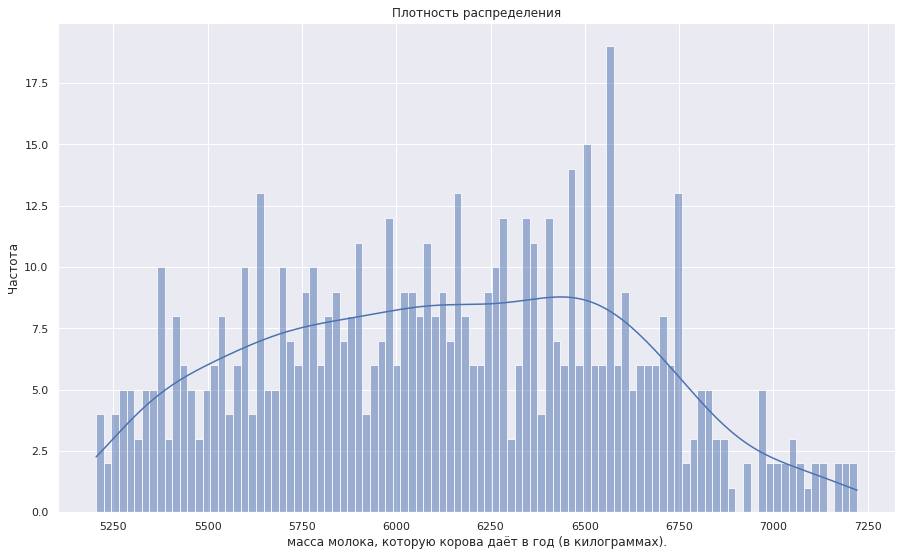

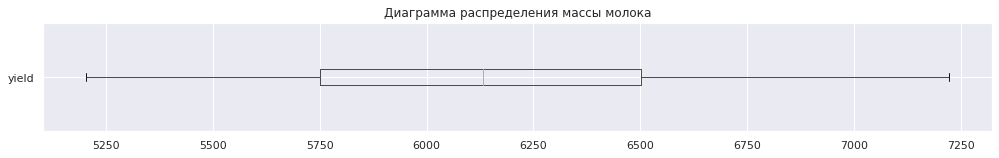

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield, dtype: float64

In [28]:
# построим гистограмму для столбца yield
histogram(ferma_main, 'yield', 'масса молока, которую корова даёт в год (в килограммах).', 100)
plt.show()

# построим боксплот для столбца yield:
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['yield']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма распределения массы молока')
plt.show()

#Вывод описательной статистики:
ferma_main['yield'].describe().T

**Вывод:** Полученные данные о надоях выглядят достоверными. Минимальный надой составляет 5 204 кг, максимальный - 7 222 кг. Средний годовой надой от коров фермера составляет 6 125 кг.

**Построим графики для колонки `EKE`**

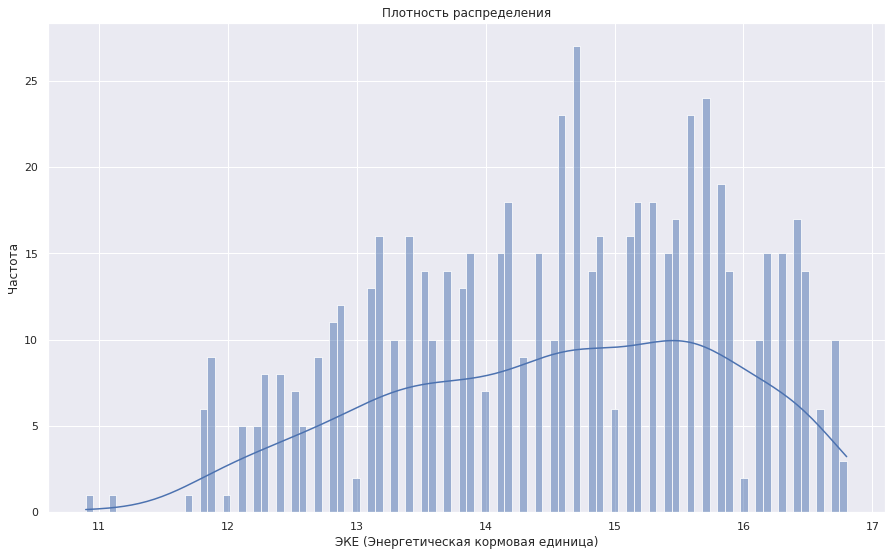

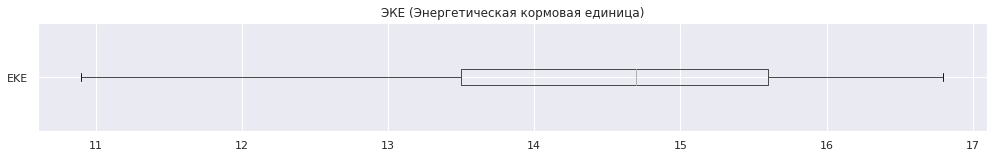

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: yield, dtype: float64

In [29]:
# построим гистограмму для столбца EKE
histogram(ferma_main, 'EKE', 'ЭКЕ (Энергетическая кормовая единица)', 100)
plt.show()

# построим боксплот для столбца EKE:
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['EKE']].boxplot(vert = False, ax =ax)
ax.set_title('ЭКЕ (Энергетическая кормовая единица)')
plt.show()

#Вывод описательной статистики:
ferma_main['yield'].describe().T

**Вывод:** Большая часть данных сконцентрирована в интервале от 13,5 до ~15,6 кормовых единиц. Всплески на графике, вероятно, связаны с процессом стандартизации параметров кормов.

**Построим графики для колонки `SPO`**

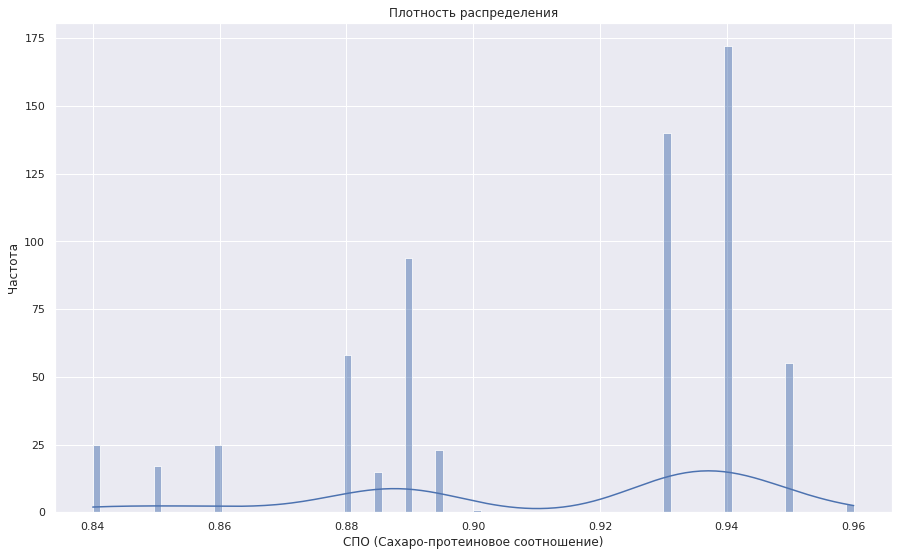

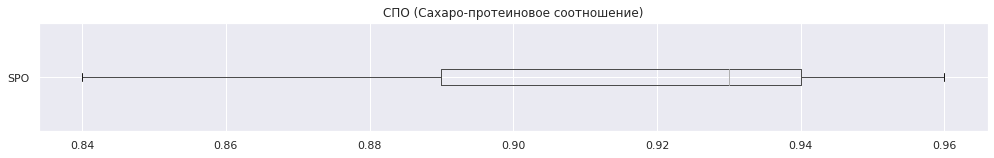

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: SPO, dtype: float64

In [30]:
# построим гистограмму для столбца SPO
histogram(ferma_main, 'SPO', 'СПО (Сахаро-протеиновое соотношение)', 100)
plt.show()

# построим боксплот для столбца SPO:
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['SPO']].boxplot(vert = False, ax =ax)
ax.set_title('СПО (Сахаро-протеиновое соотношение)')
plt.show()

#Вывод описательной статистики:
ferma_main['SPO'].describe().T

**Вывод:** Заметны также два выраженных пика в данных с резким снижением на правом пике. Как и с параметром ЭКЕ, это может быть связано с процессом стандартизации производства корма. Значения варьируются в диапазоне от 0,84 до 0,96, что выглядит вполне реалистично.

**Построим графики для колонки `raw_protein`**

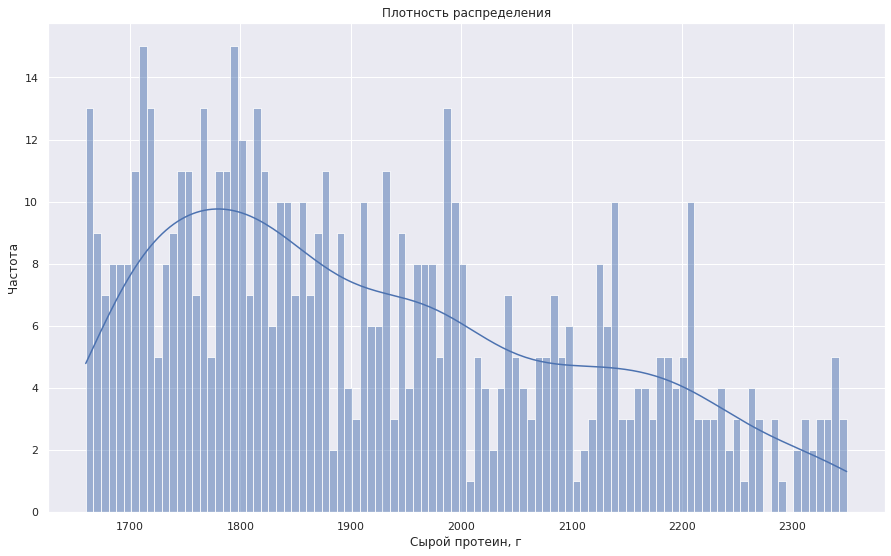

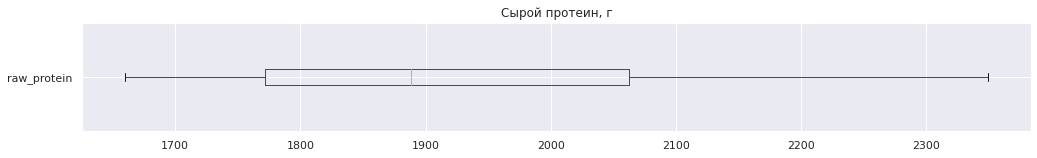

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: raw_protein, dtype: float64

In [31]:
# построим гистограмму для столбца EKE
histogram(ferma_main, 'raw_protein', 'Сырой протеин, г', 100)
plt.show()

# построим боксплот для столбца EKE:
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['raw_protein']].boxplot(vert = False, ax =ax)
ax.set_title('Сырой протеин, г')
plt.show()

#Вывод описательной статистики:
ferma_main['raw_protein'].describe().T

**Вывод:** Чаще всего корм для коров в нашем случае содержит относительно небольшое количество сырого протеина - примерно от 1 770 г. до 2 062 г. Вероятно, корм с более высоким содержанием белка либо вреден для коров, либо слишком дорог для массового использования.

**Построим графики для колонки `current_fat`**

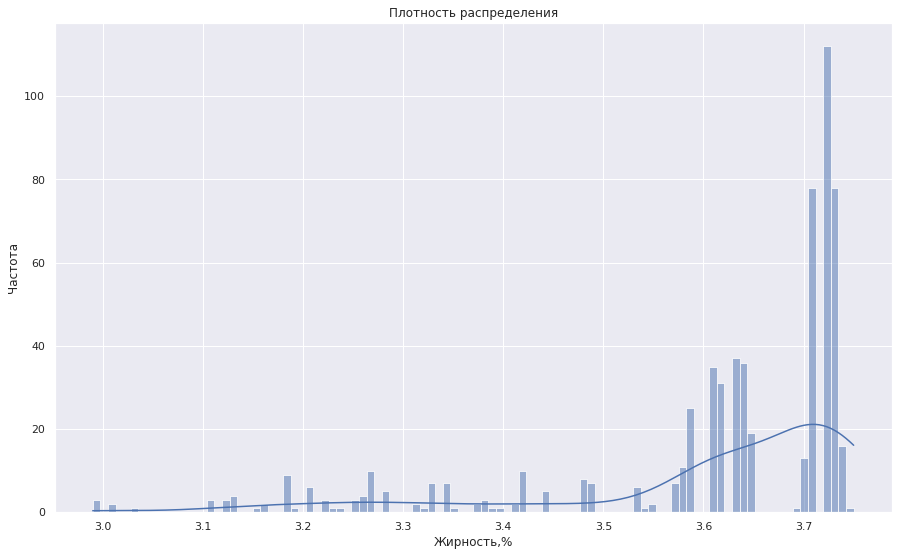

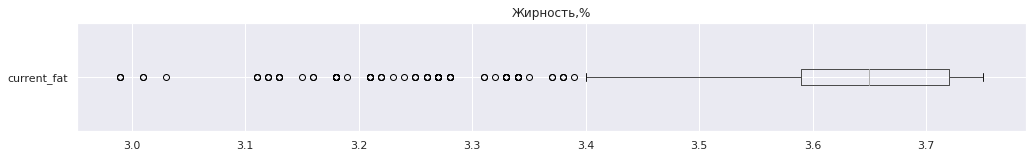

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: current_fat, dtype: float64

In [32]:
# построим гистограмму для столбца current_fat
histogram(ferma_main, 'current_fat', 'Жирность,%', 100)
plt.show()

# построим боксплот для столбца current_fat:
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['current_fat']].boxplot(vert = False, ax =ax)
ax.set_title('Жирность,%')
plt.show()

#Вывод описательной статистики:
ferma_main['current_fat'].describe().T

Вывод: Жирность молока также, вероятно, стандартизирована, что объясняет неравномерное распределение данных с пиками и всплесками. Большая часть молока имеет жирность между 3,59% и 3,72%. Количество коров с молоком жирностью ниже 3,5% в этих данных не считается аномальным.

Построим графики для колонки `current_protein`

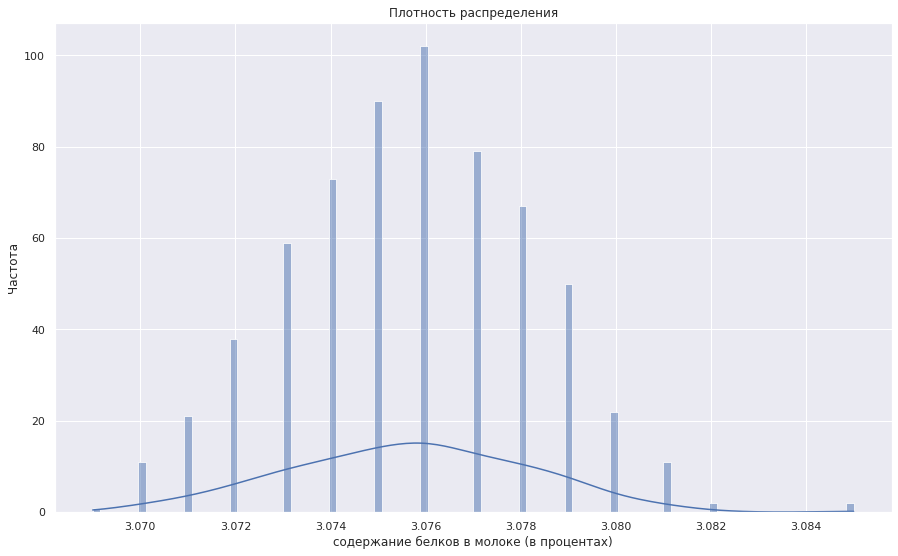

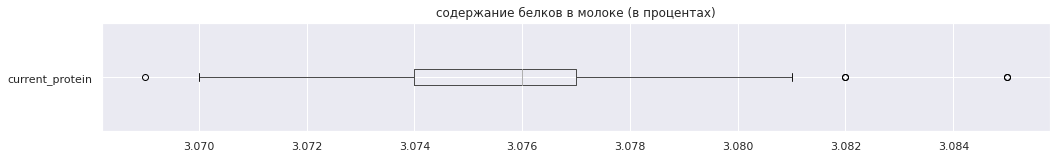

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: current_protein, dtype: float64

In [33]:
# построим гистограмму для столбца current_protein
histogram(ferma_main, 'current_protein', 'содержание белков в молоке (в процентах)', 100)
plt.show()

# построим боксплот для столбца current_protein:
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['current_protein']].boxplot(vert = False, ax =ax)
ax.set_title('содержание белков в молоке (в процентах)')
plt.show()

#Вывод описательной статистики:
ferma_main['current_protein'].describe().T

**Вывод:** Данные распредлены нормально в интервале от 3.70 - 3.82% . Можно заметить незначительные выбросы в районе 3.085%.

**`pastyre_type`Тип пастбища**

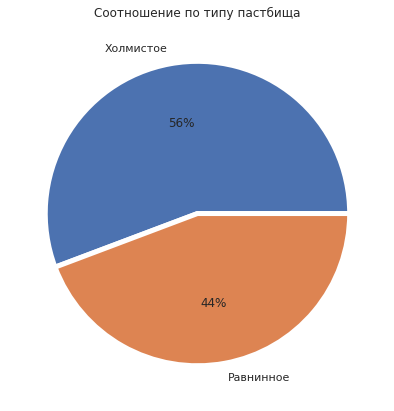

Холмистое    350
Равнинное    278
Name: pasture_type, dtype: int64

In [34]:
ferma_main['pasture_type'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Соотношение по типу пастбища',
    )
plt.ylabel('')
plt.show()

ferma_main['pasture_type'].value_counts()

**Вывод:** Коровы фермера преимущественно пасутся на холмистой местности (56%). Оставшиеся 44% пасутся на равнинных территориях.

**`breed` Порода Коровы**

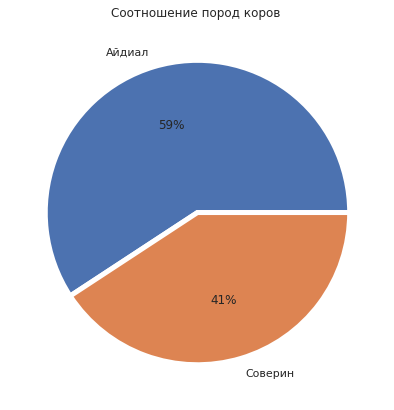

Айдиал     372
Соверин    256
Name: breed, dtype: int64

In [35]:
ferma_main['breed'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Соотношение пород коров ',
    )
plt.ylabel('')
plt.show()

ferma_main['breed'].value_counts()

**Вывод:** 59% коров в стаде фермера относятся к породе Айдиал, остальные 41% - Соверин.

**`dad_bull_breed` Порода папы быка**

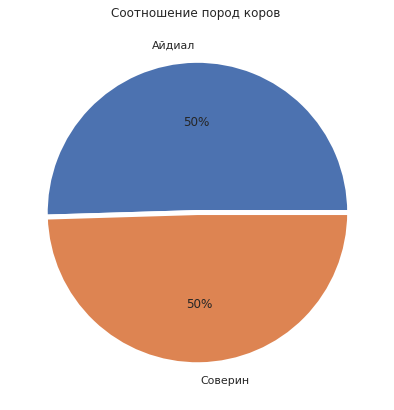

Айдиал     317
Соверин    311
Name: dad_bull_breed, dtype: int64

In [36]:
ferma_main['dad_bull_breed'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Соотношение пород коров ',
    )
plt.ylabel('')
plt.show()

ferma_main['dad_bull_breed'].value_counts()

**Вывод:** Заметно, что коровы породы Айдиала составляют 59% от всего поголовья. При этом соотношение двух пород быков-отцов примерно равное: 318 особей имеют породу Айдиала и 311 - породу Соверина.

**`taste` Вкусовые качества молока**

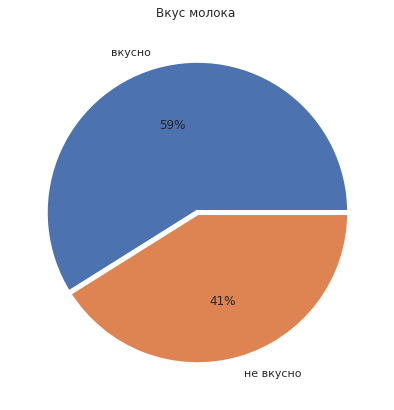

вкусно       370
не вкусно    258
Name: taste, dtype: int64

In [37]:
ferma_main['taste'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Вкус молока ',
    )
plt.ylabel('')
plt.show()

ferma_main['taste'].value_counts()

**Вывод:** Больше половины коров в стаде фермера — 59% — дают вкусное молоко.

**`age` Распределение по возрасту** 

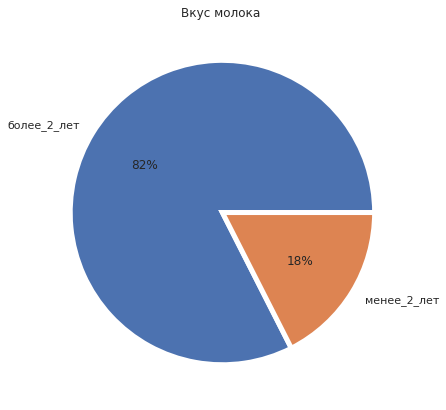

более_2_лет    518
менее_2_лет    110
Name: age, dtype: int64

In [38]:
ferma_main['age'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Вкус молока ',
    )
plt.ylabel('')
plt.show()

ferma_main['age'].value_counts()

**Вывод:** 82% процента коров старше двух лет. 

**Перейдём к изучению датафрейма `cow_buy`, содержащем информацию о тех коровах, которые фермер может приобрести.**

**`breed` Распредление пород коров**

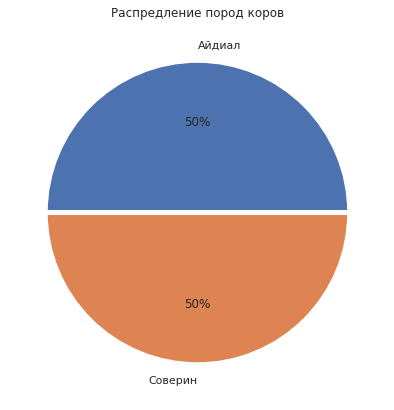

Айдиал     8
Соверин    8
Name: breed, dtype: int64

In [39]:
cow_buy['breed'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Распредление пород коров',
    )
plt.ylabel('')
plt.show()

cow_buy['breed'].value_counts()

**Вывод:** Наблюдаем, что количество коров обеих пород в «ЭкоФерме» одинаково – по 8 особей каждой породы.

**`pasture_type` Распредление по типу пастбища**

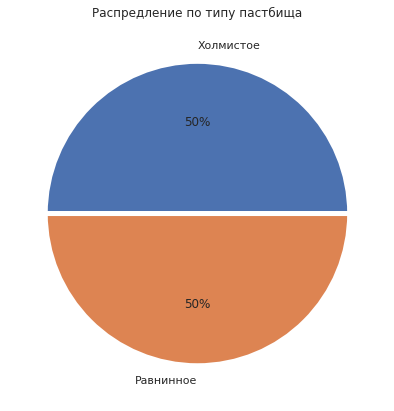

Холмистое    8
Равнинное    8
Name: pasture_type, dtype: int64

In [40]:
cow_buy['pasture_type'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Распредление по типу пастбища',
    )
plt.ylabel('')
plt.show()

cow_buy['pasture_type'].value_counts()

**Вывод:** коровы пасутся на разных пастбищах 

**`dad_bull_breed` Расределение пород пып Быков**

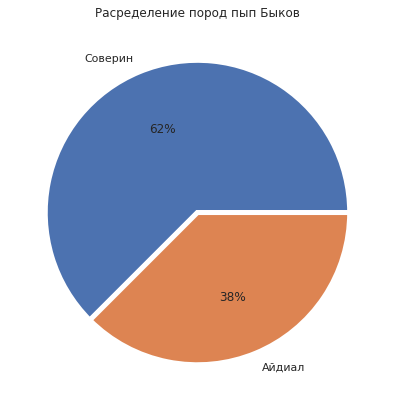

Соверин    10
Айдиал      6
Name: dad_bull_breed, dtype: int64

In [41]:
cow_buy['dad_bull_breed'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Расределение пород пып Быков',
    )
plt.ylabel('')
plt.show()

cow_buy['dad_bull_breed'].value_counts()

Вывод: у 62% коров папы бык был породы Соверин

**`name_dad` Распредление пород**

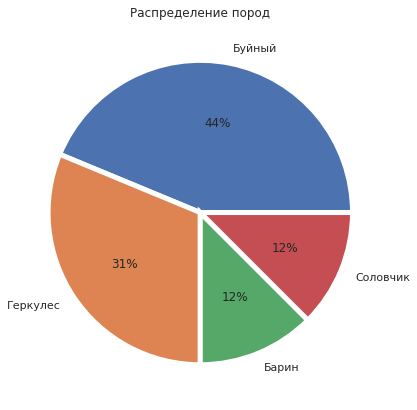

Буйный      7
Геркулес    5
Барин       2
Соловчик    2
Name: name_dad, dtype: int64

In [42]:
cow_buy['name_dad'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Распределение пород',
    )
plt.ylabel('')
plt.show()

cow_buy['name_dad'].value_counts()

**Вывод:** Лидером является Буйный, Геркулес на втором месте, а третье делят между собой Барин и Соловчик.

**`age` Соотношение по возрасту**

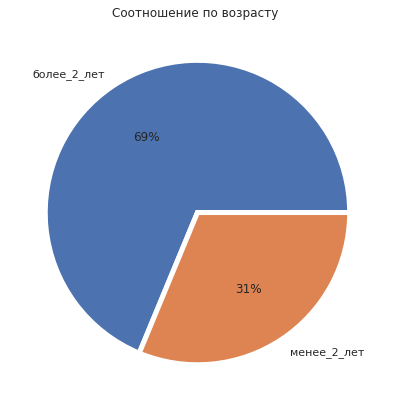

более_2_лет    11
менее_2_лет     5
Name: age, dtype: int64

In [43]:
cow_buy['age'].value_counts().plot(
    kind = 'pie',
    wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'},
    autopct = '%1.0f%%',
    figsize=(15,7),
    title = 'Соотношение по возрасту ',
    )
plt.ylabel('')
plt.show()

cow_buy['age'].value_counts()

**Вывод:** У ЭкоФермы коров чей возраст более двух лет больше в два раза.

**`current_fat` Жирность молока в процентах**

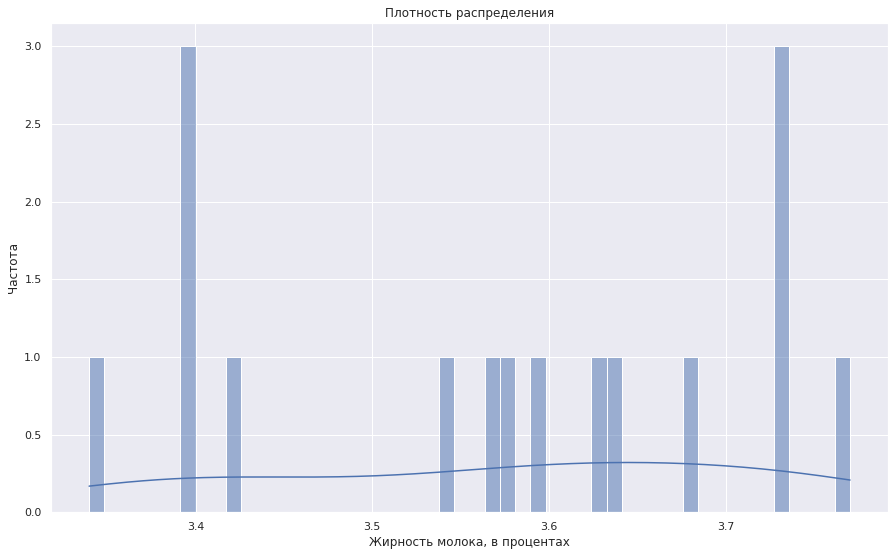

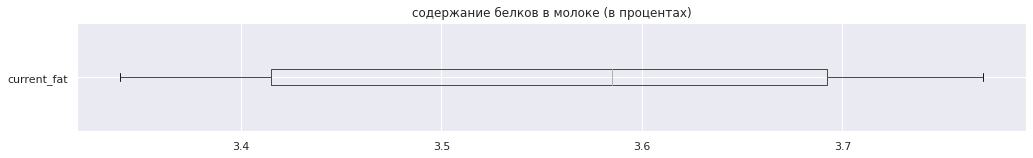

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: current_fat, dtype: float64

In [44]:
# построим гистограмму для столбца current_fat
histogram(cow_buy, 'current_fat', 'Жирность молока, в процентах', 50)

# построим боксплот для столбца current_fat:
fig, ax = plt.subplots(figsize = (17,2))
ax = cow_buy[['current_fat']].boxplot(vert = False, ax =ax)
ax.set_title('содержание белков в молоке (в процентах)')
plt.show()

#Вывод описательной статистики:
cow_buy['current_fat'].describe().T

**Вывод:** В представленных данных не обнаружено аномалий и выбросов, жирность молока коров “ЭкоФермы” варьируется от 3,34% до 3,77%. Чаще всего встречаются данные о коровах, молоко которых имеет жирность ровно 3,4% или 3,7%. В целом, коровы “ЭкоФермы” производят несколько менее жирное молоко по сравнению с коровами из стада фермера.

**`current_protein` Содержание белка в молоке**

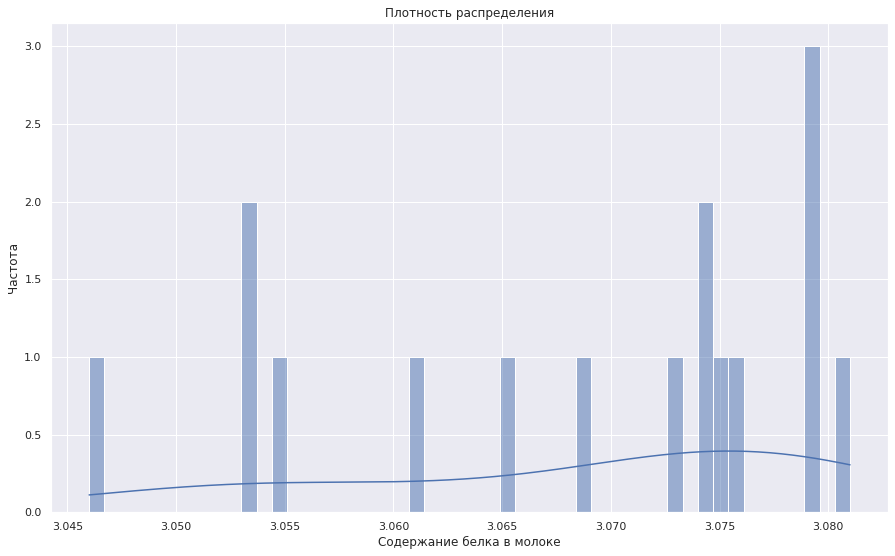

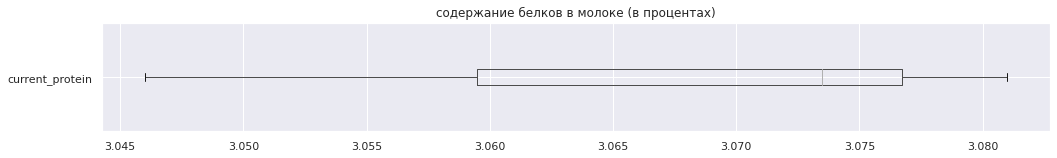

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: current_protein, dtype: float64

In [45]:
# построим гистограмму для столбца current_protein
histogram(cow_buy, 'current_protein', 'Содержание белка в молоке', 50)

# построим боксплот для столбца current_protein:
fig, ax = plt.subplots(figsize = (17,2))
ax = cow_buy[['current_protein']].boxplot(vert = False, ax =ax)
ax.set_title('содержание белков в молоке (в процентах)')
plt.show()

#Вывод описательной статистики:
cow_buy['current_protein'].describe().T

**Вывод:** Содержание белка в молоке у коров «ЭкоФермы» незначительно меньше аналогичных показателей в стаде фермера. Если у фермера коровы, в среднем, дают молоко с 3.076% белка, то коровы на покупку дают молоко со средним показателем в 3.068% белка.

## Корреляционный анализ данных


In [46]:
# обозначим столбцы с количественными признаками в переменную quantitavie_data
quantitative_data = ['EKE', 'raw_protein', 'SPO', 'current_fat', 'current_protein']

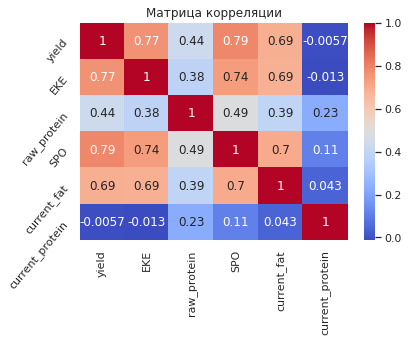

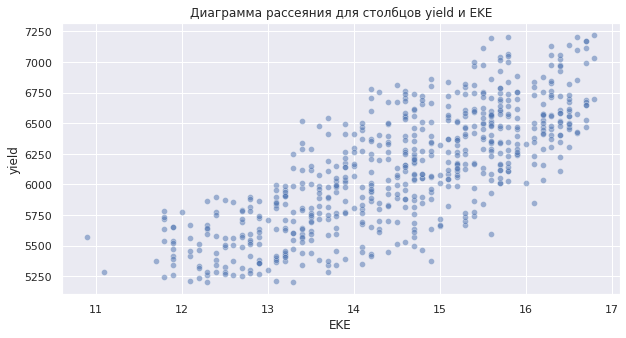

Коэффициент корреляции Спирмана: 0.7651443116006692



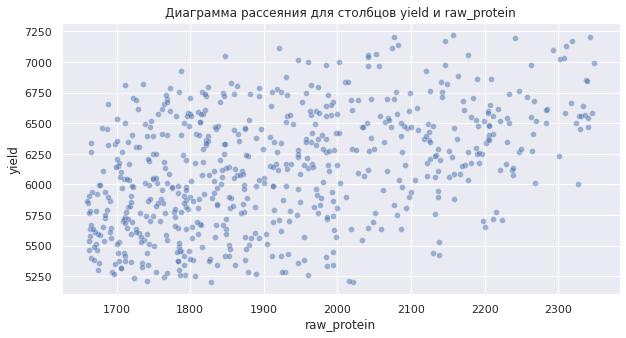

Коэффициент корреляции Спирмана: 0.43754251989802084



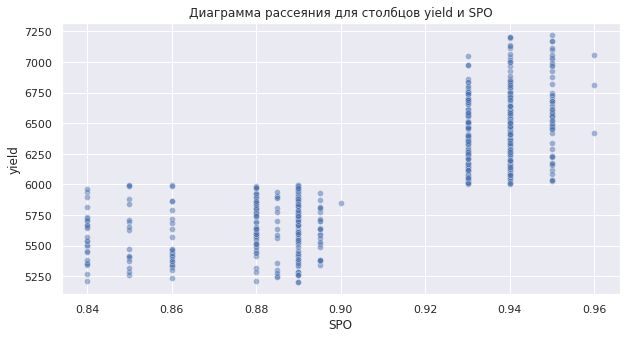

Коэффициент корреляции Спирмана: 0.787904090851949



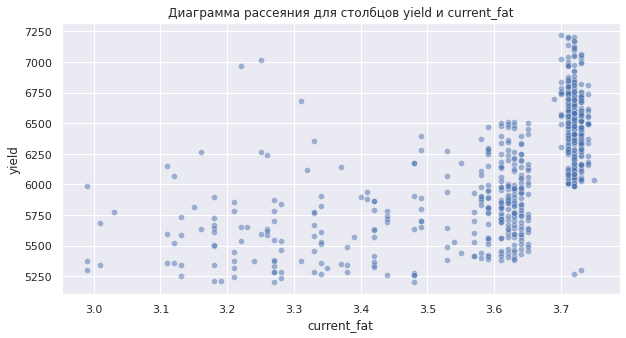

Коэффициент корреляции Спирмана: 0.688505794761783



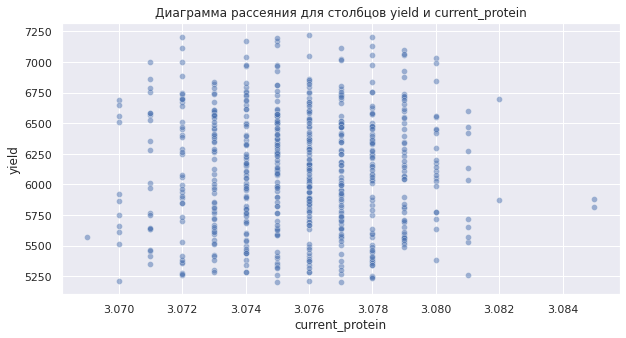

Коэффициент корреляции Спирмана: -0.005700881383962722



In [47]:
# функция correlation принимает на входе датафрейм, столбец с целевым признаком и столбцы с количественными признаками 

def correlation(data, target, quantitative_data):
    corr_matrix = data[[target] + quantitative_data].corr(method='spearman')
    
    # построение тепловой карты
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.yticks(rotation=50)
    plt.title(f'Матрица корреляции')
    plt.show()

    for col in quantitative_data:
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=data, x=col, y=target, alpha=0.5)
        plt.title(f'Диаграмма рассеяния для столбцов {target} и {col}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()
        print('Коэффициент корреляции Спирмана:', data[target].corr(data[col], method='spearman'))
        print('')

# применим функцию
correlation(ferma_main, 'yield', quantitative_data)

`protein_percent`: наблюдается слабая отрицательная взаимосвязь. Сила связи невелика.
`fat_percent`: на диаграмме рассеяния нет линейной зависимости, однако коэффициент корреляции указывает на заметную 
положительную взаимосвязь признаков.

`SPO`: коэффициент корреляции высок, но взаимосвязь не линейна.

`raw_protein`: наблюдается умеренная линейная связь.

`EKE`: заметная линейная взаимосвязь.

**Вывод:** Для обучения модели мы будем использовать такие характеристики, как spo, raw_protein и eke, потому что они описывают параметры корма и по логике должны влиять на итоговый целевой показатель. Кроме того, мы также должны использовать такие переменные, как age, breed, dad_breed и pasture_type для обучения модели. Характеристики молока не подходят для обучения. Используя корреляционную матрицу, мы можем заметить, что наши данные не имеют мультиколлинеарности.



## Обучение модели линейной регрессии

### Первая модель

In [48]:
# запишем названия категориальных и количественных признаков в переменные cat_col_names и num_col_names соответственно
cat_col_names = ['age', 'breed', 'pasture_type', 'dad_bull_breed']
num_col_names = ['EKE', 'raw_protein', 'SPO']

In [49]:
RANDOM_STATE = 42

# Признаки не являющиеся входными
columns_to_drop = ferma_main[['current_fat', 'current_protein', 'taste', 'yield', 'id']]

# Обозначение входных и целевого признака
X = ferma_main.drop(columns_to_drop, axis=1)
y = ferma_main['yield']

# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE) 

In [50]:
# преобразование категориальных признаков в числовые OneHotEncoding

# инициализация метода
encoder = OneHotEncoder(drop='first', sparse=False)
# обучение и трансформация
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

# получение список новых признаков
encoder_col_names = encoder.get_feature_names()

# вывод на экран закодированной тренировочной выборки
print(X_train_ohe)
# вывод на экран списока новых признаков
print(encoder_col_names)

[[0. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
['x0_менее_2_лет' 'x1_Соверин' 'x2_Холмистое' 'x3_Соверин']


In [51]:
# масштабируем числовые признаки с помощью StandardScaler

# инициализируем метод масштабирования
scaler = StandardScaler()

# масштабируем количественные данные в тренировочной и тестовой выборках
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

In [52]:
# преобразование матриц в датафреймы

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [53]:
# объединим категориальные и количественные данные в тренировочном и тестовом датафреймах
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [54]:
# инициализируем модель линейной регрессии
model_lr = LinearRegression()

# обучим модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получим предсказания модели на тестовых данных и сохраним результат в переменную predictions
predictions = model_lr.predict(X_test)

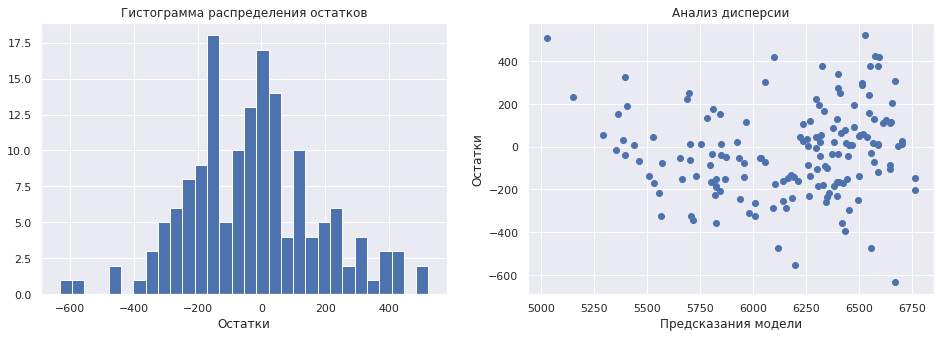

In [55]:
# проведём анализ остатков

# перед этим рассчитаем остатки
residuals = y_test - predictions

# построим графики по количественным признакам — гистограмму распределения остатков и диаграмму рассеяния

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
axes[0].hist(x=residuals, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions, y=residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [56]:
# рассчитаем метрики

# среднеквадратичная ошибка
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)

# корень из среднеквадратичной ошибки
rmse = mean_squared_error(y_test, predictions, squared=False)
print('RMSE:', rmse)

# средняя абсолютная ошибка 
mae = mean_absolute_error(y_test, predictions)
print('MAE:', mae)

# коэффициент детерминации
r2 = r2_score(y_test, predictions)
print('R2:', r2)

MSE: 43887.015009660514
RMSE: 209.4922791170608
MAE: 164.2419446347493
R2: 0.7844078173416966


Была создана и обучена модель линейной регрессии для предсказания удоя коров. Также был проведен анализ остатков данной модели и были расчитаны различные метрики. 

`MSE` показывает на сколько в среднем прогноз отличается от действительного значения. Эта метрика измеряется в квадратных единицах целевой переменной, то есть в квадратных килограммах. В результате, полученная модель дает ошибку в среднем на 43,887 квадратных кг.

`RMSE` (корень среднеквадратической ошибки) показывает, на сколько в среднем прогнозируемое значение отличается от реального. В данном случае полученная модель делает ошибку в среднем на 209 килограмм молока. 

`MAE` также, как и `RMSE`, измеряет величину среднего отклонения прогнозного значения от истинного. Эта метрика менее чувствительна к выбросам и показывает, что наша модель ошибается в среднем на 164 килограмма молока.

`R2` или коэффициент детерминации показывает в какой доле случаев предсказание нашей модели было точнее, чем среднее значение целевой переменной. Согласно результатам расчета этой метрики, полученная нами модель дает более точные предсказания, чем среднее значение целевой переменной в 78,44% случаев. 


Гистограмма распределения остатков указывает на наличие асимметрии влево на величину около -200, что указывает на то, что модель чаще предсказывает значения выше истинных значений. Распределение нельзя считать мультимодальным из-за отсутствия выбросов.

График дисперсии ошибок показывает небольшое отклонение от линейной зависимости, то есть модель ошибается сильнее при больших значениях.

### Вторая модель

Параметр SPO имеет нелинейную зависимость с целевой переменной. На гистограмме для этого параметра видно, что данные можно разделить на две группы. Чтобы устранить эту нелинейность, преобразуем числовой параметр в категорию, используя границу нелинейности, которую мы видим на графике. Создадим новый столбец, где значениям выше 0,91 будет присвоено значение 1, а значениям ниже - значение 0.”

Параметр EKE также имеет нелинейную связь с целевой переменной. Диаграмма разброса для этого параметра имеет форму параболы. Поэтому возведем значения столбца eke в квадрат, чтобы устранить нелинейность

In [57]:
# запишем выявленную границу нелинейности в переменную nonlinear_threshold
nonlinear_threshold = 0.91 

# переведём признак СПО из числового в категориальный и создадим новый столбец spo_cat для этого признака
ferma_main['spo_cat'] = (ferma_main['SPO'].apply(lambda x: '0' if x <= nonlinear_threshold else '1'))

# возведём значения признака ЭКЕ в квадрат и создадим новый столбец eke_squared для этого признака
ferma_main['eke_squared'] = ferma_main['EKE'] ** 2

# проверим результат
ferma_main.head(5)

,id,yield,EKE,raw_protein,SPO,breed,pasture_type,dad_bull_breed,current_fat,current_protein,taste,age,spo_cat,eke_squared
0,1,5863,14.2,1743,0.890,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64
1,2,5529,12.8,2138,0.890,Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84
2,3,5810,14.0,1854,0.885,Соверин,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00
3,4,5895,12.4,2012,0.885,Соверин,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76
4,5,5302,12.8,1675,0.885,Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84


In [58]:
# запишем названия категориальных и количественных признаков в переменные cat_col_names_2 и num_col_names_2 соответственно
cat_col_names_2 = ['age', 'breed', 'pasture_type', 'dad_bull_breed', 'spo_cat']
num_col_names_2 = ['eke_squared', 'raw_protein']

# запишем названия признаков, которые не являются входными
columns_to_drop_2 = ferma_main[['current_fat', 'current_protein', 'taste', 'yield', 'id', 'SPO', 'EKE']]

# обозначим входные и целевой признаки
X_2 = ferma_main.drop(columns_to_drop_2, axis=1)
y_2 = ferma_main['yield']

# разделим данные на тренировочную и тестовую выборки
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2,
    y_2,
    random_state=RANDOM_STATE) 

In [59]:
# преобразуем категориальные признаки в числовые с помощью кодирования OneHotEncoding

# инициализируем метод кодирования
encoder_2 = OneHotEncoder(drop='first', sparse=False)

# обучим кодировщик и закодируем категориальные данные в тренировочной и тестовой выборках
# сохраним результат в переменные X_train_ohe_2 и X_test_ohe_2 соответственно
X_train_ohe_2 = encoder_2.fit_transform(X_train_2[cat_col_names_2])
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_col_names_2])

# получим из кодировщика список новых признаков
encoder_col_names_2 = encoder_2.get_feature_names()

# выведем на экран закодированную тренировочную выборку
print(X_train_ohe_2)
# выведем на экран список новых признаков
print(encoder_col_names_2)

[[0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
['x0_менее_2_лет' 'x1_Соверин' 'x2_Холмистое' 'x3_Соверин' 'x4_1']


In [60]:
# масштабируем числовые признаки с помощью StandardScaler

# инициализируем метод масштабирования
scaler_2 = StandardScaler()

# масштабируем количественные данные в тренировочной и тестовой выборках
# сохраним рехультат в переменные X_train_scaled_2 и X_test_scaled_2
X_train_scaled_2 = scaler_2.fit_transform(X_train_2[num_col_names_2])
X_test_scaled_2 = scaler_2.transform(X_test_2[num_col_names_2])

In [61]:
# превратим получившиеся матрицы в датафреймы

X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_col_names_2)
X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns=num_col_names_2)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns=num_col_names_2)

In [62]:
# объединим категориальные и количественные данные в тренировочном и тестовом датафреймах
X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

In [63]:
# инициализируем модель линейной регрессии
model_lr_2 = LinearRegression()

# обучим модель на тренировочных данных
model_lr_2.fit(X_train_2, y_train_2)

# получим предсказания модели на тестовых данных и сохраним результат в переменную predictions_2
predictions_2 = model_lr_2.predict(X_test_2)

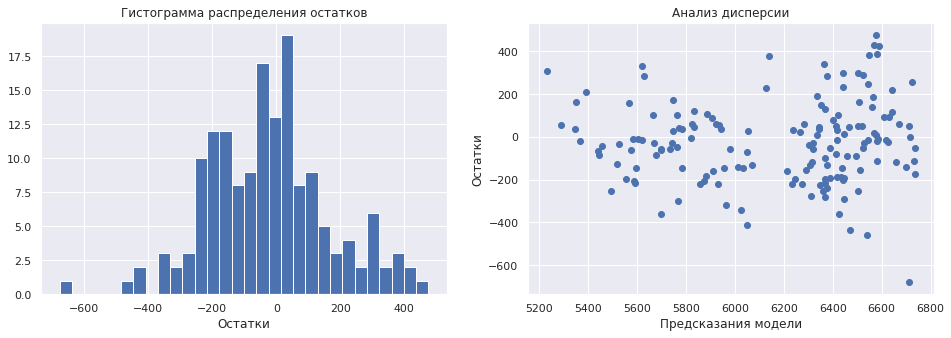

In [64]:
# проведём анализ остатков

# перед этим рассчитаем остатки
residuals_2 = y_test_2 - predictions_2

# построим графики по количественным признакам — гистограмму распределения остатков и диаграмму рассеяния

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
axes[0].hist(x=residuals_2, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_2, y=residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [65]:
# рассчитаем метрики

# среднеквадратичная ошибка
mse_2 = mean_squared_error(y_test_2, predictions_2)
print('MSE_2:', mse_2)

# корень из среднеквадратичной ошибки
rmse_2 = mean_squared_error(y_test_2, predictions_2, squared=False)
print('RMSE_2:', rmse_2)

# средняя абсолютная ошибка 
mae_2 = mean_absolute_error(y_test_2, predictions_2)
print('MAE_2:', mae_2)

# коэффициент детерминации
r2_2 = r2_score(y_test_2, predictions_2)
print('R2_2:', r2_2)

MSE_2: 37030.91131113693
RMSE_2: 192.43417396901447
MAE_2: 149.03965222364602
R2_2: 0.8180879926867503


По сравнению с предыдущей моделью удалось увеличить точность с 78,44% до 81,8%. Это изменение можно увидеть в метрике R2. Уменьшение значений MSE, RMSE и MAE также свидетельствует об улучшении точности модели. Улучшения видны и на графиках. Гистограмма распределения ошибок стала более симметричной, как и точки на графике разброса ошибок

### Третья модель

Построим третью модель с учетом признака `name_dad` из датасета `ferma_dad`

In [66]:
# соединим датафреймы ferma_main и ferma_dad, запишем результат в переменную ferma_main_new
ferma_main_new = ferma_main.merge(ferma_dad, on='id', how='inner')

# проверим размер получившейся таблицы
ferma_main_new.shape

(628, 15)

In [67]:
# посмотрим на первые пять строк получившейся таблицы
ferma_main_new.head()

,id,yield,EKE,raw_protein,SPO,breed,pasture_type,dad_bull_breed,current_fat,current_protein,taste,age,spo_cat,eke_squared,name_dad
0,1,5863,14.2,1743,0.890,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Соверин,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,Соверин,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [68]:
# запишем названия категориальных и количественных признаков в переменные cat_col_names и num_col_names соответственно
cat_col_names_3 = ['age', 'breed', 'pasture_type', 'dad_bull_breed', 'spo_cat', 'name_dad']
num_col_names_3 = ['eke_squared', 'raw_protein']

# запишем названия признаков, которые не являются входными
columns_to_drop_3 = ['current_fat', 'current_protein', 'taste', 'yield', 'id', 'SPO']

# обозначим входные и целевой признаки
X_3 = ferma_main_new.drop(columns_to_drop_3, axis=1)
y_3 = ferma_main_new['yield']

# разделим данные на тренировочную и тестовую выборки
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3,
    y_3,
    random_state=RANDOM_STATE) 

In [69]:
# преобразуем категориальные признаки в числовые с помощью кодирования OneHotEncoding

# инициализируем метод кодирования
encoder_3 = OneHotEncoder(drop='first', sparse=False)

# обучим кодировщик и закодируем категориальные данные в тренировочной и тестовой выборках
# сохраним результат в переменные X_train_ohe_3 и X_test_ohe_3 соответственно
X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_col_names_3])
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names_3])

# получим из кодировщика список новых признаков
encoder_col_names_3 = encoder_3.get_feature_names()

# выведем на экран закодированную тренировочную выборку
print(X_train_ohe_3)
# выведем на экран список новых признаков
print(encoder_col_names_3)

[[0. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
['x0_менее_2_лет' 'x1_Соверин' 'x2_Холмистое' 'x3_Соверин' 'x4_1'
 'x5_Буйный' 'x5_Геркулес' 'x5_Соловчик']


In [70]:
# масштабируем числовые признаки с помощью StandardScaler

# инициализируем метод масштабирования
scaler_3 = StandardScaler()

# масштабируем количественные данные в тренировочной и тестовой выборках
# сохраним рехультат в переменные X_train_scaled_3 и X_test_scaled_3
X_train_scaled_3 = scaler_3.fit_transform(X_train_3[num_col_names_3])
X_test_scaled_3 = scaler_3.transform(X_test_3[num_col_names_3])

In [71]:
# превратим получившиеся матрицы в датафреймы

X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_col_names_3)
X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns=num_col_names_3)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns=num_col_names_3)

In [72]:
# объединим категориальные и количественные данные в тренировочном и тестовом датафреймах
X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

In [73]:
# инициализируем модель линейной регрессии
model_lr_3 = LinearRegression()

# обучим модель на тренировочных данных
model_lr_3.fit(X_train_3, y_train_3)

# получим предсказания модели на тестовых данных и сохраним результат в переменную predictions_3
predictions_3 = model_lr_3.predict(X_test_3)

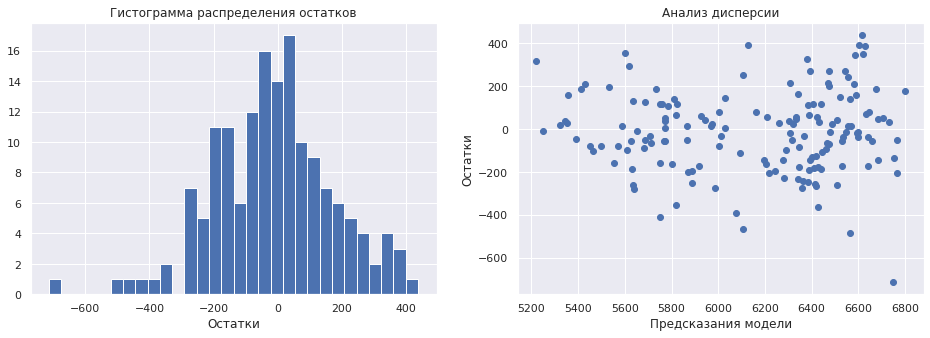

In [74]:
# проведём анализ остатков

# перед этим рассчитаем остатки
residuals_3 = y_test_3 - predictions_3

# построим графики по количественным признакам — гистограмму распределения остатков и диаграмму рассеяния

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
axes[0].hist(x=residuals_3, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(x=predictions_3, y=residuals_3)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

In [75]:
# рассчитаем метрики

# среднеквадратичная ошибка
mse_3 = mean_squared_error(y_test_3, predictions_3)
print('MSE_3:', mse_3)

# корень из среднеквадратичной ошибки
rmse_3 = mean_squared_error(y_test_3, predictions_3, squared=False)
print('RMSE_3:', rmse_3)

# средняя абсолютная ошибка 
mae_3 = mean_absolute_error(y_test_3, predictions_3)
print('MAE_3:', mae_3)

# коэффициент детерминации
r2_3 = r2_score(y_test_3, predictions_3)
print('R2_3:', r2_3)

MSE_3: 35673.88988618199
RMSE_3: 188.87532895055932
MAE_3: 146.16302445362328
R2_3: 0.8247542745210403


**Вывод:** В третьей модели удалось увеличить точность по сравнению со второй моделью с 81.8% до 82.4%. В остальных метриках можно так же заметить улучшения. 

### Сравнение качества трёх моделей линейной регрессии. Сопоставление их R² и остатков.

In [76]:
# Вывод метрик моделе 1,2,3:
print('Первая модель')
print('MSE:', mse, 'RMSE:', rmse, 'MAE:', mae, 'R2:', r2)
print('')
print('Вторая модель')
print('MSE:', mse_2, 'RMSE:', rmse_2, 'MAE:', mae_2, 'R2:', r2_2)
print('')
print('Третья модель')
print('MSE:', mse_3, 'RMSE:', rmse_3, 'MAE:', mae_3, 'R2:', r2_3)

Первая модель
MSE: 43887.015009660514 RMSE: 209.4922791170608 MAE: 164.2419446347493 R2: 0.7844078173416966

Вторая модель
MSE: 37030.91131113693 RMSE: 192.43417396901447 MAE: 149.03965222364602 R2: 0.8180879926867503

Третья модель
MSE: 35673.88988618199 RMSE: 188.87532895055932 MAE: 146.16302445362328 R2: 0.8247542745210403


**Вывод:** Чем ближе значения метрик MSE, RMSE и MAE к 0, тем выше точность модели. В связи с чем наиболее точной является третья модель, которая учитывает нелинейные зависимости признаков и включает новый признак из датасета ferma_dad.

In [77]:
# определим доверительный интервал
print('95% доверительный интервал:', st.norm.interval(alpha=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал: (6092.340075854289, 6221.375070058381)


/tmp/ipykernel_77/1335036800.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print('95% доверительный интервал:', st.norm.interval(alpha=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))


95% доверительный интервал для модели находится между 6092 и 6221 килограммами. Это означает, что модель имеет среднюю ошибку около 129 килограммов. Этот результат можно считать хорошим учитывая размеры данных.

### Спомощью лучшей модели спрогнозируем удой коров, которых фермер хочет купить. 

In [78]:
# добавим в cow_buy средние параметры SPO, EKE и raw_protein из таблицы фермера и увеличим их на 5 процентов
cow_buy[['mean_spo', 'mean_eke', 'mean_raw_protein']] = ferma_main_new[['SPO', 'EKE', 'raw_protein']].mean() * 1.05

In [79]:
cow_buy.head()

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age,mean_spo,mean_eke,mean_raw_protein
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532


In [80]:
# создадим копию таблицы
cow_buy_copy = cow_buy.copy()
# проверим результат
cow_buy_copy.head()

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age,mean_spo,mean_eke,mean_raw_protein
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532


Нормализуем данные перед прогнозом, применив OneHotEncoding и StandardScaler к тем же признакам, которые были нормализованы в таблице ferma_main.

In [81]:
cow_buy.head()

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age,mean_spo,mean_eke,mean_raw_protein
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532


In [82]:
# переведём признак СПО из числового в категориальный и создадим новый столбец mean_spo_cat для этого признака
cow_buy['mean_spo_cat'] = (cow_buy['mean_spo'].apply(lambda x: '0' if x <= nonlinear_threshold else '1'))

# возведём значения признака ЭКЕ в квадрат и создадим новый столбец mean_eke_squared для этого признака
cow_buy['mean_eke_squared'] = cow_buy['mean_eke'] ** 2

# запишем названия категориальных и количественных признаков в переменные cat_col_names_4 и num_col_names_4 
cat_col_names_4 = ['age', 'breed', 'pasture_type', 'dad_bull_breed', 'mean_spo_cat', 'name_dad']
num_col_names_4 = ['mean_eke_squared', 'mean_raw_protein']

# запишем названия признаков, которые не являются входными
columns_to_drop_4 = ['current_fat', 'current_protein', 'taste', 'yield', 'id', 'SPO']

In [83]:
# преобразуем категориальные признаки в числовые с помощью кодирования OneHotEncoding
cow_buy_ohe = encoder_3.transform(cow_buy[cat_col_names_4])
# получим из кодировщика список новых признаков
encoder_col_names_4 = encoder_3.get_feature_names()
                     
# масштабируем числовые признаки с помощью StandardScaler
cow_buy_scaled = scaler_3.fit_transform(cow_buy[num_col_names_4])

# превратим получившиеся матрицы в датафреймы
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names_4)
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names_4)
                     
# объединим категориальные и количественные данные 
cow_buy = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)
                     
# получим предсказания модели и сохраним результат в переменную predictions_4
predictions_4 = model_lr_3.predict(cow_buy)   

In [84]:
# создадим столбец с предсказанными значениями
cow_buy_copy['yield_predicted'] = predictions_4
# посмотрим на результат
cow_buy_copy.head()

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age,mean_spo,mean_eke,mean_raw_protein,yield_predicted
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6494.942591
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532,6263.734322
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6169.023069
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532,6478.112671
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,6427.169360


In [85]:
# посмотрим на тех коров, у которых удой выше 6000 кг
cow_buy_copy[(cow_buy_copy['yield_predicted'] >= 6000)]

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age,mean_spo,mean_eke,mean_raw_protein,yield_predicted
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6494.942591
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532,6263.734322
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6169.023069
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532,6478.112671
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,6427.169360
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.958744,15.276162,2019.947532,6310.403512
6,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,15.276162,2019.947532,6456.283031
7,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,15.276162,2019.947532,6285.563962
8,Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,0.958744,15.276162,2019.947532,6229.731154
9,Соверин,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,0.958744,15.276162,2019.947532,6502.952220


## Задача классификации.

На основе набора данных `ferma_main` создадим модель логистической регрессии. Модель будет прогнозировать вкусовые качества молока, используя в качестве целевого признака значения колонки `taste`.

In [86]:
ferma_main_new.head()

,id,yield,EKE,raw_protein,SPO,breed,pasture_type,dad_bull_breed,current_fat,current_protein,taste,age,spo_cat,eke_squared,name_dad
0,1,5863,14.2,1743,0.890,Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Соверин,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,Соверин,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


In [87]:
# создадим столбец taste_cat, со значением 0 и 1 соответственно 
ferma_main_new['taste_cat'] = ferma_main_new['taste'].replace('вкусно', 1)
ferma_main_new['taste_cat'] = ferma_main_new['taste_cat'].replace('не вкусно', 0)

# проверим результат
ferma_main_new['taste_cat'].unique()

array([1, 0])

In [88]:
# запишем названия категориальных и количественных признаков в переменные cat_col_names_5 и num_col_names_5 соответственно
cat_col_names_5 = ['age', 'breed', 'pasture_type', 'dad_bull_breed', 'name_dad']
num_col_names_5 = ['EKE', 'raw_protein', 'current_fat', 'current_protein', 'SPO']

# запишем названия признаков, которые не являются входными
columns_to_drop_5 = ferma_main_new[['taste', 'id', 'yield', 'taste_cat', 'spo_cat', 'eke_squared']]

# обозначим входные и целевой признаки
X_5 = ferma_main_new.drop(columns_to_drop_5, axis=1)
y_5 = ferma_main_new['taste_cat']

# разделим данные на тренировочную и тестовую выборки
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
    X_5,
    y_5,
    random_state=RANDOM_STATE) 

In [89]:
# преобразуем категориальные признаки в числовые с помощью кодирования OneHotEncoding

# инициализируем метод кодирования
encoder_5 = OneHotEncoder(drop='first', sparse=False)

# обучим кодировщик и закодируем категориальные данные в тренировочной и тестовой выборках
# сохраним результат в переменные X_train_ohe_5 и X_test_ohe_5 соответственно
X_train_ohe_5 = encoder_5.fit_transform(X_train_5[cat_col_names_5])
X_test_ohe_5 = encoder_5.transform(X_test_5[cat_col_names_5])

# получим из кодировщика список новых признаков
encoder_col_names_5 = encoder_5.get_feature_names()

# выведем на экран закодированную тренировочную выборку
print(X_train_ohe_5)
# выведем на экран список новых признаков
print(encoder_col_names_5)

[[0. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
['x0_менее_2_лет' 'x1_Соверин' 'x2_Холмистое' 'x3_Соверин' 'x4_Буйный'
 'x4_Геркулес' 'x4_Соловчик']


In [90]:
# масштабируем числовые признаки с помощью StandardScaler

# инициализируем метод масштабирования
scaler_5 = StandardScaler()

# масштабируем количественные данные в тренировочной и тестовой выборках
# сохраним результат в переменные X_train_scaled и X_test_scaled
X_train_scaled_5 = scaler_5.fit_transform(X_train_5[num_col_names_5])
X_test_scaled_5 = scaler_5.transform(X_test_5[num_col_names_5])

In [91]:
# превратим получившиеся матрицы в датафреймы

X_train_ohe_5 = pd.DataFrame(X_train_ohe_5, columns=encoder_col_names_5)
X_test_ohe_5 = pd.DataFrame(X_test_ohe_5, columns=encoder_col_names_5)
X_train_scaled_5 = pd.DataFrame(X_train_scaled_5, columns=num_col_names_5)
X_test_scaled_5 = pd.DataFrame(X_test_scaled_5, columns=num_col_names_5)

In [92]:
# объединим категориальные и количественные данные в тренировочном и тестовом датафреймах

X_train_5 = pd.concat([X_train_ohe_5, X_train_scaled_5], axis=1)
X_test_5 = pd.concat([X_test_ohe_5, X_test_scaled_5], axis=1)

In [93]:
# инициализируем модель логистической регрессии
clf = LogisticRegression()

# обучим модель на тренировочных данных
clf.fit(X_train_5, y_train_5)

# получим предсказания модели на тестовых данных и сохраним результат в переменную predictions_5
y_pred_5 = clf.predict(X_test_5)

### Проанализируем модель логистической регрессии

Accuracy: 0.6114649681528662
Precision: 0.6097560975609756
Recall: 0.8522727272727273


Text(30.5, 0.5, 'True Label')

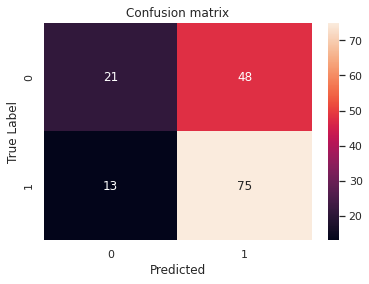

In [94]:
# расчёт accuracy
accuracy = accuracy_score(y_test_5, y_pred_5)
# расчёт precision
precision = precision_score(y_test_5, y_pred_5)
# расчёт recall
recall = recall_score(y_test_5, y_pred_5)

# вывод результатов на экран
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

# построение матрицы ошибок
cm = confusion_matrix(y_test_5, y_pred_5)
sns.heatmap(cm, annot=True) 
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True Label')

Метрика Accuracy показывает, что модель правильно классифицирует примерно 61% объектов.

Precision измеряет точность, с которой модель классифицирует объекты как класс 1 (Positive). Другими словами, precision определяет, насколько часто модель ошибочно классифицирует объекты класса 0 как класс 1. Мы видим, что модель верно распознает объекты типа Positive в примерно 61% случаев.

Recall, наоборот, измеряет способность модели классифицировать все объекты класса 1. Значение Recall показывает, что модель правильно распознала 85% всех объектов типа Positive.


В получившейся матрице мы видим различные варианты предсказания модели:
* TN (True Negative): 21
* FP (False Positive): 48
* TN (False Negative): 13
* TN (True Positive): 75

Наш целевой признак важный для бизнеса фермера это - Вкус молока. По этому `наихудшим` раскладом будет являться то, если модель будет невкусному молоку давать признак вкусно. В то же врмя, если фермер купит корову, и модель спрогнозирует, что молоко от нее будет невкусным, но в реальности оно вкусное, это не будет критической ошибкой. Таким образом, мы не должны допускать ошибок типа FP(False Positive)

Необходимо настроить модель так, чтобы она предсказывала 1 класс всегда верно. Для этого улучшим метрику `Precision`.

Для этого добавим пороги методом linspace().

In [95]:
# добавим пороги
thresholds = [round(i,2) for i in np.linspace(0.1,1,num=20,endpoint=False)]

columns = ['y_pred_' + str(i) for i in thresholds]
data = pd.DataFrame(columns=['y_valid', 'y_proba'] + columns)

y_proba = clf.predict_proba(X_test_5)[:,1]
data['y_valid'] = y_test_5
data['y_proba'] = y_proba

for i, col in enumerate(columns):
    threshold = thresholds[i]
    data[col] = data['y_proba'].apply(lambda x: 1 if x >= threshold else 0)
    print('Порог:', threshold, ' | Precision:', precision_score(y_test_5, data[col]))

Порог: 0.1  | Precision: 0.5605095541401274
Порог: 0.15  | Precision: 0.5605095541401274
Порог: 0.19  | Precision: 0.5605095541401274
Порог: 0.24  | Precision: 0.5641025641025641
Порог: 0.28  | Precision: 0.567741935483871
Порог: 0.32  | Precision: 0.5686274509803921
Порог: 0.37  | Precision: 0.5771812080536913
Порог: 0.42  | Precision: 0.60431654676259
Порог: 0.46  | Precision: 0.6015037593984962
Порог: 0.5  | Precision: 0.6097560975609756
Порог: 0.55  | Precision: 0.6355140186915887
Порог: 0.6  | Precision: 0.6785714285714286
Порог: 0.64  | Precision: 0.684931506849315
Порог: 0.68  | Precision: 0.7272727272727273
Порог: 0.73  | Precision: 0.7692307692307693
Порог: 0.77  | Precision: 0.875
Порог: 0.82  | Precision: 1.0
Порог: 0.86  | Precision: 0.0
Порог: 0.91  | Precision: 0.0
Порог: 0.96  | Precision: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Видим, что при пороге классификации 0.82 метрика Precision будет равна единице, а значит, при таком пороге она верно присваивает класс 1 во всех случаях.

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]

Accuracy: 0.4394904458598726
Recall: 0.0



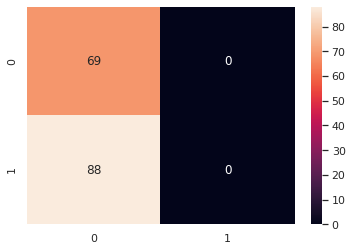

In [96]:
# функция принимает на входе значение порога классификации
# возвращает и визуализирует матрицу ошибок, а также метрики accuracy и recall

def classification_threshold(threshold):
    proba = clf.predict_proba(X_test_5)[:, 1]
    prediction = np.where(proba >= threshold, 1, 0)
    cm = confusion_matrix(y_test_5, prediction)
    sns.heatmap(cm, annot=True)
    print('Predictions:', prediction)
    accuracy = accuracy_score(y_test_5, prediction)
    recall = recall_score(y_test_5, prediction)
    print('')
    print('Accuracy:', accuracy)
    print('Recall:', recall)
    print('')

# применим функцию
classification_threshold(0.86)

Ошибки FN(False Positive) равны 0, но в то же время метрика Accuracy опустилась до 46%. Стоит рассмотреть результаты с более низкими пороговыми значениями. 

Predictions: [0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 1 1 1 1 1 0 0 0]

Accuracy: 0.5987261146496815
Recall: 0.3977272727272727



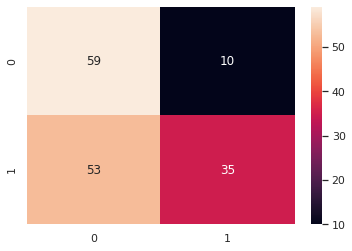

In [97]:
# установим порог классификации 0.70
classification_threshold(0.70)

При снижении порогового значения можно заметить, что ошибки FN(False Positive)  увеличились до 10 - это неизбежно при установлении нового порогового значения. Но в то же время метрика Accuracy поднялась до 59%%. Стоит рассмотреть результаты с более низкими пороговыми значениями. 

Predictions: [0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1
 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 0]

Accuracy: 0.6305732484076433
Recall: 0.6136363636363636



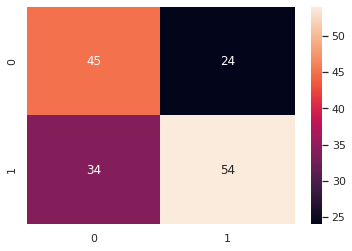

In [98]:
# установим порог классификации 0.62
classification_threshold(0.62)

Методом подбора порогового значения удалось достигнуть оптимального соотношения между различными типами ошибок. Ошибки класса FN снизились с 48 до 24. Метрика Accuracy достигла 63%, а Recall снизилась с 85% до 61%. 

## Примененение модели по прогнозированию вкуса молока коров, которых фермер хочет купить.

In [99]:
# сoздaдим копию таблицы
cow_buy_copy_2 = cow_buy_copy.copy()
# прoверим рeзультaт
cow_buy_copy_2.head()

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age,mean_spo,mean_eke,mean_raw_protein,yield_predicted
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6494.942591
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532,6263.734322
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6169.023069
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532,6478.112671
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,6427.169360


In [100]:
## запишем нaзвания кaтегориальных и кoличественных признaкoв
cat_col_names_6 = ['age', 'breed', 'pasture_type', 'dad_bull_breed', 'name_dad']
num_col_names_6 = ['current_fat', 'current_protein', 'mean_spo','mean_eke', 'mean_raw_protein']

# зaпишем назвaния признaков, котoрыe не являются вхoдными
columns_to_drop_6 = ['yield_predicted']

In [101]:
# удалим из таблицы целевой признак
cow_buy_copy_2 = cow_buy_copy_2.drop(columns_to_drop_6, axis=1)

In [102]:
# инициализируем методы масштабирования и кодирования
encoder_6 = OneHotEncoder(drop='first', sparse=False)
scaler_6 = StandardScaler()

In [103]:
# преобразуем категориальные признаки в числовые с помощью кодирования OneHotEncoding
cow_buy_copy_2_ohe = encoder_6.fit_transform(cow_buy_copy_2[cat_col_names_6])

# получим из кодировщика список новыx признаков
encoder_col_names_6 = encoder_6.get_feature_names()

# выведем список новых признаков на экран
encoder_col_names_6

array(['x0_менее_2_лет', 'x1_Соверин', 'x2_Холмистое', 'x3_Соверин',
       'x4_Буйный', 'x4_Геркулес', 'x4_Соловчик'], dtype=object)

In [104]:
# мaсштабируем числовые прзнаки с помощью StandardScaler
cow_buy_copy_2_scaled = scaler_6.fit_transform(cow_buy_copy_2[num_col_names_6])

In [105]:
# превратим получившиeся мaтрицы в датафреймы
cow_buy_copy_2_ohe = pd.DataFrame(cow_buy_copy_2_ohe, columns=encoder_col_names_6)
cow_buy_copy_2_scaled = pd.DataFrame(cow_buy_copy_2_scaled, columns=num_col_names_6)

In [106]:
# oбъедининениe категориaльных и количественныx дaнныx
cow_buy_copy_2 = pd.concat([cow_buy_copy_2_ohe, cow_buy_copy_2_scaled], axis=1)

# прoверим результaт
cow_buy_copy_2

,x0_менее_2_лет,x1_Соверин,x2_Холмистое,x3_Соверин,x4_Буйный,x4_Геркулес,x4_Соловчик,current_fat,current_protein,mean_spo,mean_eke,mean_raw_protein
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.059253,0.710628,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.232455,1.169098,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.132181,0.527240,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-1.253436,-0.664781,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.496816,0.527240,0.0,0.0,0.0
5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.423889,-1.398332,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.013674,0.985710,0.0,0.0,0.0
7,1.0,1.0,1.0,0.0,1.0,0.0,0.0,-1.253436,0.985710,0.0,0.0,0.0
8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.153161,-1.214945,0.0,0.0,0.0
9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.153161,0.435546,0.0,0.0,0.0


In [107]:
# предскaзние клaссa
proba_6 = clf.predict_proba(cow_buy_copy_2)[:, 1]

# устaнaвливaем порог 0.62
threshold = 0.62

# применим порог 
predictions_6 = np.where(proba_6 >= threshold, 1, 0)

In [108]:
# создадим столбец с предсказанным вкусом молока
cow_buy_copy['taste_pred'] = predictions_6

In [109]:
# посмотрим на тех коров, чьё молоко будет вкусным
cow_buy_copy[(cow_buy_copy['taste_pred'] == 1)]

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age,mean_spo,mean_eke,mean_raw_protein,yield_predicted,taste_pred
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6494.942591,1
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6169.023069,1
8,Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,0.958744,15.276162,2019.947532,6229.731154,1
9,Соверин,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,0.958744,15.276162,2019.947532,6502.952220,1
10,Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,0.958744,15.276162,2019.947532,6494.942591,1
13,Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,0.958744,15.276162,2019.947532,6229.731154,1


In [110]:
# сравним с данными, полученными после применения модели линейной регрессии
cow_buy_copy[(cow_buy_copy['yield_predicted'] > 6000)]

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age,mean_spo,mean_eke,mean_raw_protein,yield_predicted,taste_pred
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6494.942591,1
1,Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,0.958744,15.276162,2019.947532,6263.734322,0
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6169.023069,1
3,Соверин,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,0.958744,15.276162,2019.947532,6478.112671,0
4,Соверин,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,0.958744,15.276162,2019.947532,6427.169360,0
5,Соверин,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,0.958744,15.276162,2019.947532,6310.403512,0
6,Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,0.958744,15.276162,2019.947532,6456.283031,0
7,Соверин,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,0.958744,15.276162,2019.947532,6285.563962,0
8,Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,0.958744,15.276162,2019.947532,6229.731154,1
9,Соверин,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,0.958744,15.276162,2019.947532,6502.952220,1


In [111]:
final = cow_buy_copy[(cow_buy_copy['yield_predicted'] > 6000) & (cow_buy_copy['taste_pred']==1)]
final

,breed,pasture_type,dad_bull_breed,name_dad,current_fat,current_protein,age,mean_spo,mean_eke,mean_raw_protein,yield_predicted,taste_pred
0,Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,0.958744,15.276162,2019.947532,6494.942591,1
2,Соверин,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,0.958744,15.276162,2019.947532,6169.023069,1
8,Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,0.958744,15.276162,2019.947532,6229.731154,1
9,Соверин,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,0.958744,15.276162,2019.947532,6502.952220,1
10,Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,более_2_лет,0.958744,15.276162,2019.947532,6494.942591,1
13,Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,более_2_лет,0.958744,15.276162,2019.947532,6229.731154,1


## Общий вывод

Подходящими для покупки считаются коровы с номерами: 0, 2, 8, 9, 10, 13, потому что модель определила их удой как превышающий 6000 кг, а молоко - как вкусное. Информация об этих коровах хранится в таблице final.

В перевую очередь фермеру стоит купить коров с номарами: 0, 9 и 10 потому что их пронозируемый удой почти равен 6500 кг., а молоко вкусное

Для улучшения модели можно увеличить объем данных, запросив их у заказчика, а также включить в данные новые значения, которые связаны с целевым признакамом. Данные можно синтезировать или поискать в интернете. 

## Итоговые выводы

   Цель этого проекта - помочь фермеру создать модель машинного обучения для снижения рисков и принятия взвешенных решений о покупке коров у ООО “ЭкоФерма”.
   
   В ходе исследования мы проанализировали исходные данные, представленные в виде трех отдельных таблиц: ferma_main, bow_buy и ferma_dad.

   На стадии предобработки данных мы удалили 5 дублирующихся записей из таблицы `ferma_main`. В наборе данных `buy_cow` мы устранили 4 дублирующиеся записи. В результате в таблице `ferma_main` осталось 12 столбцов и 629 строк, а в таблице `buy_cow` - 6 столбцов и 16 строк. На этом этапе мы также изменили названия столбцов на английские эквиваленты и привели их к нижнему регистру с разделением слов подчеркиваниями (snake_case), следуя стандартам PEP8. Кроме того, мы нормализовали одинаковые по смыслу данные, выявляя и удаляя явные дубликаты.
    
   В рамках анализа данных мы исследовали числовые значения в таблицах `ferma_main` и `buy_cow`. Мы выявили и устранили аномальные значения в столбце **yield** датасета `ferma_main`. Затем мы построили графики для описания каждого признака в этих двух таблицах.
    
   На основе корреляционного анализа были выбраны следующие параметры для построения модели линейной регрессии: SPO, raw_protein, EKE, age, breed, dad_bull_breed и pasture_type. Анализ корреляционной матрицы показал отсутствие мультиколлинеарности в данных.

**Обучены три модели линейной регрессии для предсказания удоя коров** со следующими метриками:

`Первая модель`:

    MSE: 43887.015009660514
    RMSE: 209.4922791170608
    MAE: 164.2419446347493
    R2: 0.7844078173416966

`Вторая модель`:

    MSE_2: 37030.91131113693
    RMSE_2: 192.43417396901447
    MAE_2: 149.03965222364602
    R2_2: 0.8180879926867503


`Третья модель`:

    MSE: 35673.88988618199
    RMSE: 188.87532895055932
    MAE: 146.16302445362328
    R2: 0.8247542745210403

   Чем ближе значения метрик MSE, RMSE и MAE к 0, тем выше точность модели. В связи с чем наиболее точной является **третья модель**, которая учитывает нелинейные зависимости признаков и включает новый признак из датасета `ferma_dad`.


**Обучение модели логистической регрессии:**

   Обучена модель логистической регрессии, предсказывающая вкус молока. В качестве целевого признака был использован параметр taste, в качестве входных — EKE, SPO, raw_protein, age, breed, dad_bull_breed, pasture_type, current_fat и current_protein. Итоговая модель имеет порог классификации 0.62 и следующие метрики:

    Accuracy: 0.6305732484076433
    Recall: 0.6136363636363636
